# Continuous Control

---

Follow the instructions below to get started!

### 1. Start the Environment

Run the next code cell to install a few packages.  This line will take a few minutes to run!

In [2]:
import gym
import random
import torch
import numpy as np
from collections import deque
import matplotlib.pyplot as plt
%matplotlib inline

from ddpg_agent import Agent

In [23]:
import pickle

The environments corresponding to both versions of the environment are already saved in the Workspace and can be accessed at the file paths provided below.  

Please select one of the two options below for loading the environment.

In [3]:
from unityagents import UnityEnvironment
import numpy as np

env = UnityEnvironment(file_name='Reacher_Windows_x86_64_20/Reacher.exe')

INFO:unityagents:
'Academy' started successfully!
Unity Academy name: Academy
        Number of Brains: 1
        Number of External Brains : 1
        Lesson number : 0
        Reset Parameters :
		goal_speed -> 1.0
		goal_size -> 5.0
Unity brain name: ReacherBrain
        Number of Visual Observations (per agent): 0
        Vector Observation space type: continuous
        Vector Observation space size (per agent): 33
        Number of stacked Vector Observation: 1
        Vector Action space type: continuous
        Vector Action space size (per agent): 4
        Vector Action descriptions: , , , 


Environments contain **_brains_** which are responsible for deciding the actions of their associated agents. Here we check for the first brain available, and set it as the default brain we will be controlling from Python.

In [4]:
# get the default brain
brain_name = env.brain_names[0]
brain = env.brains[brain_name]

### 2. Examine the State and Action Spaces

Run the code cell below to print some information about the environment.

In [5]:
# reset the environment
env_info = env.reset(train_mode=True)[brain_name]

# number of agents
num_agents = len(env_info.agents)
print('Number of agents:', num_agents)

# size of each action
action_size = brain.vector_action_space_size
print('Size of each action:', action_size)

# examine the state space 
states = env_info.vector_observations
state_size = states.shape[1]
print('There are {} agents. Each observes a state with length: {}'.format(states.shape[0], state_size))
print('The state for the first agent looks like:', states[0])

Number of agents: 20
Size of each action: 4
There are 20 agents. Each observes a state with length: 33
The state for the first agent looks like: [  0.00000000e+00  -4.00000000e+00   0.00000000e+00   1.00000000e+00
  -0.00000000e+00  -0.00000000e+00  -4.37113883e-08   0.00000000e+00
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00  -1.00000000e+01   0.00000000e+00
   1.00000000e+00  -0.00000000e+00  -0.00000000e+00  -4.37113883e-08
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00   5.75471878e+00  -1.00000000e+00
   5.55726624e+00   0.00000000e+00   1.00000000e+00   0.00000000e+00
  -1.68164849e-01]


### 3. Take Actions in the Environment

In [6]:
agent = Agent(state_size=33, action_size=4, random_seed=1000, replicates=20)

In [8]:
#text_file = open("Training_20agents_updating_20t_every10s.txt", "w")
#text_file.write('AGENT \n CRITIC MODEL {} \n ACTOR MODEL: {} \n ######### \n'.format(agent.critic_local,agent.actor_local))
n_episodes=1000
max_t=1000
interval=100
goal_score=30


scores_deque = deque(maxlen=100)
scores = []
for i_episode in range(1, n_episodes+1):
    env_info = env.reset(train_mode=True)[brain_name]        
    states = env_info.vector_observations                  
    score = np.zeros(num_agents)           

    for t in range(max_t):
        actions = agent.act(states)
        env_info = env.step(actions)[brain_name]
        next_states = env_info.vector_observations         
        rewards = env_info.rewards                         
        dones = env_info.local_done                        
        score += env_info.rewards   
        agent.step(t, states, actions, rewards, next_states, dones)
        states = next_states           
        if np.any(dones):                                  
            break
    scores_deque.append(np.mean(score))
    scores.append(np.mean(score))  
    
    torch.save(agent.actor_local.state_dict(),  'checkpoint_actor.pth' )
    torch.save(agent.critic_local.state_dict(), 'checkpoint_critic.pth')
    #text_file.write('AVERAGE SCORE: {} EPISODE: {} \n'.format(np.mean(scores), i_episode))


    print('Total score {}, average score {} on episode: {}'.format(score, np.mean(scores), i_episode))
    if (i_episode > interval-1) & (np.mean(scores_deque) >= goal_score):
        print('\nEnvironment solved!')
        break
#text_file.close()


Total score [ 1.37999997  1.02999998  0.83999998  1.45999997  0.62999999  0.80999998
  0.52999999  0.86999998  0.55999999  0.68999998  1.06999998  1.11999997
  0.25999999  1.06999998  0.55999999  0.39999999  0.34999999  0.29999999
  1.28999997  0.71999998], average score 0.7969999821856618 on episode: 1
Total score [ 0.03        0.51999999  0.60999999  0.43999999  0.58999999  1.27999997
  0.08        0.90999998  0.65999999  0.16        1.20999997  0.24999999
  0.30999999  0.65999999  0.2         0.57999999  0.68999998  0.22999999
  0.49999999  0.42999999], average score 0.6569999853149057 on episode: 2
Total score [ 0.79999998  0.22999999  0.49999999  0.22        0.17        0.36999999
  0.18        0.19        0.53999999  0.1         0.38999999  0.64999999
  1.02999998  1.12999997  0.47999999  0.31999999  0.27999999  0.85999998
  1.47999997  0.74999998], average score 0.6158333195683857 on episode: 3
Total score [ 0.49999999  0.24999999  0.52999999  0.62999999  0.75999998  0.22999999


Total score [ 1.26999997  0.85999998  2.05999995  1.99999996  2.06999995  2.02999995
  2.26999995  1.01999998  1.48999997  1.36999997  4.01999991  1.85999996
  2.38999995  0.59999999  2.04999995  1.10999998  1.64999996  2.10999995
  2.51999994  2.61999994], average score 1.114793078530708 on episode: 29
Total score [ 0.96999998  2.53999994  0.14        4.2999999   2.83999994  1.55999997
  1.63999996  2.22999995  1.50999997  1.56999996  5.92999987  2.48999994
  1.09999998  1.69999996  1.92999996  1.27999997  3.28999993  1.84999996
  1.61999996  2.60999994], average score 1.1494666409740844 on episode: 30
Total score [ 4.3299999   1.73999996  4.83999989  4.97999989  3.47999992  3.38999992
  2.06999995  4.03999991  2.82999994  1.72999996  1.79999996  3.28999993
  5.23999988  1.31999997  1.90999996  2.29999995  2.39999995  2.53999994
  3.20999993  3.59999992], average score 1.210838682613065 on episode: 31
Total score [ 6.96999984  4.82999989  2.29999995  2.02999995  0.49999999  3.65999992

Total score [ 10.59999976   6.17999986   5.64999987   4.4999999    8.02999982
   8.36999981   8.7899998   11.88999973  11.31999975   9.67999978
   6.08999986   9.0299998   10.08999977  13.5799997    6.90999985
   5.56999988   6.83999985  11.41999974  10.10999977   7.17999984], average score 2.5946160134343828 on episode: 56
Total score [  5.59999987  12.99999971   6.81999985   6.41999986   7.83999982
   3.61999992   4.2799999    9.80999978  11.41999974   8.07999982
   9.64999978   8.9399998   10.48999977   4.81999989   9.0399998
   6.12999986  14.54999967   2.76999994   6.97999984   4.87999989], average score 2.6851841505077716 on episode: 57
Total score [  3.81999991   3.97999991  13.96999969   6.19999986  10.05999978
  13.77999969   5.24999988   2.60999994   5.30999988   5.22999988
   6.03999986  11.30999975   8.34999981   3.20999993  10.89999976
  13.2799997   10.82999976   5.71999987   9.83999978   4.71999989], average score 2.7719999380409717 on episode: 58
Total score [  8.089999

Total score [ 11.34999975   3.73999992  11.90999973   9.25999979  18.0899996
  16.84999962  17.8399996   13.07999971  19.77999956  15.84999965
   9.39999979  13.82999969  12.11999973  16.07999964  14.90999967
  16.28999964   5.55999988   2.44999995  14.09999968  11.39999975], average score 5.33211573447646 on episode: 82
Total score [  8.31999981  21.12999953  12.59999972   6.31999986  19.32999957
  14.45999968  14.48999968  15.95999964   6.41999986  19.18999957
  12.45999972   4.6399999   10.61999976  15.41999966  11.66999974
  14.18999968  14.07999969   1.48999997  21.86999951   6.46999986], average score 5.419156505378434 on episode: 83
Total score [  3.70999992   3.08999993  16.18999964   7.57999983  11.93999973
   9.82999978   6.38999986   3.85999991  14.06999969  15.58999965
  12.51999972  14.20999968  18.18999959  15.70999965  15.07999966
  10.23999977  15.05999966   7.90999982   8.8199998   14.86999967], average score 5.488487972560827 on episode: 84
Total score [  9.88999978  

Total score [  9.20999979  27.81999938  26.08999942  28.81999936  17.50999961
  11.77999974  22.68999949  24.46999945   9.88999978  31.3599993
  25.78999942  21.54999952  17.44999961  29.95999933  31.92999929
  14.75999967  25.44999943  17.48999961  29.56999934  27.16999939], average score 8.189647965095247 on episode: 108
Total score [ 23.10999948  31.72999929  30.93999931  23.27999948  20.96999953
  19.06999957  22.60999949  28.88999935  25.29999943  30.53999932
  29.20999935  26.58999941  34.08999924  31.86999929  26.7899994
  15.71999965  32.35999928  24.74999945  25.75999942  29.09999935], average score 8.358862198485967 on episode: 109
Total score [ 25.25999944  32.87999927  18.36999959  14.37999968  28.06999937
  30.59999932  20.48999954  30.12999933  34.23999923  27.15999939
  29.86999933  33.45999925  23.43999948  21.07999953  25.36999943
  29.35999934  20.67999954  22.1699995   20.04999955  12.53999972], average score 8.509963446151126 on episode: 110
Total score [ 31.5899992

Total score [ 31.00999931  39.48999912  38.35999914  38.34999914  38.01999915
  34.89999922  36.64999918  38.99999913  32.58999927  37.74999916
  36.70999918  24.96999944  35.03999922  31.5099993   36.48999918
  37.42999916  25.89999942  38.94999913  34.59999923  38.31999914], average score 12.564115390811923 on episode: 134
Total score [ 34.26999923  37.13999917  33.41999925  32.63999927  29.55999934
  35.7699992   36.66999918  30.48999932  37.87999915  29.47999934
  38.38999914  26.16999942  38.52999914  32.50999927  35.46999921
  36.45999919  37.48999916  37.61999916  37.92999915  37.76999916], average score 12.728699715491384 on episode: 135
Total score [ 36.52999918  31.58999929  32.82999927  37.96999915  33.89999924
  35.19999921  29.14999935  39.40999912  33.54999925  33.82999924
  39.13999913  38.87999913  34.41999923  37.11999917  39.46999912
  37.28999917  33.19999926  33.64999925  34.42999923  29.96999933], average score 12.89302177064203 on episode: 136
Total score [ 35.279

Total score [ 36.83999918  38.92999913  39.33999912  36.75999918  39.48999912
  38.82999913  38.32999914  37.84999915  37.09999917  39.39999912
  39.23999912  39.05999913  38.37999914  39.35999912  39.46999912
  39.48999912  39.44999912  39.02999913  37.36999916  38.30999914], average score 16.493084006350834 on episode: 160
Total score [ 38.30999914  39.43999912  39.54999912  38.78999913  39.43999912
  39.27999912  37.27999917  38.75999913  39.49999912  37.90999915
  39.41999912  35.04999922  36.92999917  36.44999919  39.45999912
  37.76999916  38.51999914  38.68999914  38.93999913  39.57999912], average score 16.629484100351743 on episode: 161
Total score [ 38.29999914  39.53999912  38.81999913  39.53999912  39.46999912
  38.77999913  39.37999912  39.16999912  39.19999912  39.48999912
  39.48999912  39.62999911  39.59999911  39.38999912  39.45999912
  37.48999916  39.49999912  37.81999915  39.21999912  39.20999912], average score 16.768345304210612 on episode: 162
Total score [ 39.27

In [22]:
print("Environment solved in {} episodes.\nAverage Score in the score deque list (over 100 episodes) is {}\nAverage score in the general score list is {}".format(i_episode, np.mean(scores_deque), np.mean(scores)))

Environment solved in 181 episodes.
Average Score in the score deque list (over 100 episodes) is 30.247604323913343
Average score in the general score list is 19.05690288896215


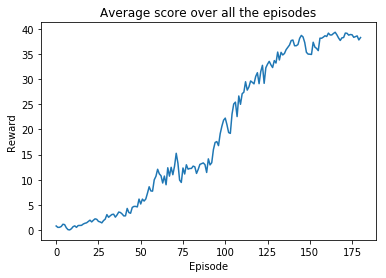

In [19]:

fig = plt.figure()
ax = fig.add_subplot(111)
plt.plot(np.arange(len(scores)), scores)
plt.title("Average score over all the episodes")
plt.ylabel('Reward')
plt.xlabel('Episode')
plt.show()

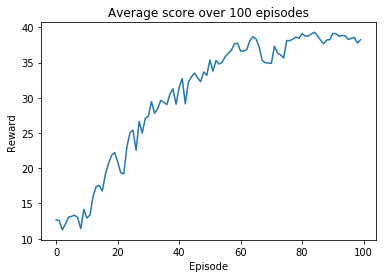

In [20]:
fig = plt.figure()
ax = fig.add_subplot(111)
plt.plot(np.arange(len(scores_deque)), scores_deque)
plt.title("Average score over 100 episodes")
plt.ylabel('Reward')
plt.xlabel('Episode')
plt.show()

In [24]:
with open('scores_deque.pkl', 'wb') as f:
    pickle.dump(scores_deque, f)


In [ ]:
env.close()